# Restledd

Her fokuserer vi på restleddet i Taylors teorem, noe som også gjøre teoremet presist og forklarer hvorfor det fungerer.

Hovedfokuset  vårt er på anvendelser med feilestimering.

## 1. Bakgrunn: Middelverdisetningen

Den enkleste versjonen av middelverdisteningen sier at det finnes et tall $a\in(x_0,x)$ slik at

$$
f(x) = f(x_0) + f'(a)(x-x_0)
$$

Dette er da den enkleste mulig form av Taylors teorem. Litt forenklet får vi Taylors teorem ved å anvende middelverdisetningen en gang til på $f'(x)$, og så på $f''(x)$ og så videre.

For eksempel har vi at
$$
f'(a) = f'(x_0) + f''(b)(a-x_0)
$$

Setter vi dette inn i forrige uttrykk får vi at

$$
\begin{align}
f(x) &= f(x_0) + \big(f'(x_0) + f''(b)(a-x_0)\big)(x-x_0) \\
&= f(x_0) + f'(x_0)(x-x_0) + f''(b)(a-x_0)(x-x_0)
\end{align}
$$

Det er ikke helt den formuleringen vi ønsker, men for å komme skal vi se på en alternativ versjon av middelverdisetningen.

## Eksempel 1

Men hva sier egentlig teoremet?

Vi ser på funksjonen

$$
f(x) = x + (x-1)(x-2)(x-3), \quad 1\leq x\leq 3
$$

Middelverdisetningen sier at det finnes et punkt $a$ mellom 1 og 3, slik at

$$
f(3) = f(1) + f'(a)(3-1),
$$

Det kan vi skrive om til

$$
\frac{f(3)-f(1)}{3-1} = f'(a),
$$

hvor venstresiden er gjennomsnittlig veksthastighet fra 1 til 3. Setningen sier altså at det finnes minst en verdi $a$ hvor veksthastigheten $f'(a)$ er nøyaktig lik gjennomsnittsveksthastigheten over hele intervallet.

Vi beregner

$$
f'(x) = 1 + (x-1)(x-2) + (x-1)(x-3) + (x-2)(x-3) = 1 + (x^2 - 3x + 2) + (x^2 - 4x + 3) + (x^2 - 5x + 6) = 3x^2 -12x + 12
$$

Nå er $f(1)=1, f(3)=3$, slik at 

$$
\frac{f(3)-f(1)}{3-1} = 1.
$$

Vi kan løse $f'(a)=1$, og finner to løsninger

$$
a = \frac{12 \pm \sqrt{(-12)^2 - 4\cdot 3\cdot 11}}{2\cdot 3} = 2 \pm \frac{\sqrt{12}}{6} = 2 \pm \frac{\sqrt{3}}{3}
$$

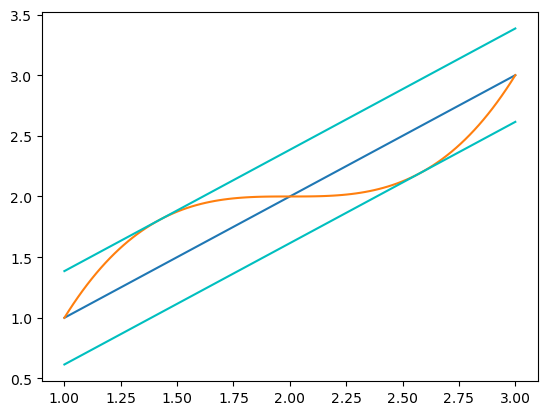

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 100 punkter mellom 1 og 3
x = np.linspace(1,3,100)

# funksjonen f(x) defineres; kan nå kalles som f(x)
def f(x):
    return x + (x-1)*(x-2)*(x-3)

# plotter y=x i mørk blå, som er sekanten mellom f(1) og f(3)
plt.plot(x,x)
# plotter y=f(x) i oransje, selveste funksjonen
plt.plot(x,f(x))

# plotter 2 tangentlinjer med samme stigningstall som sekanten, begge i cyan

# plotter tangentlinjen gjennom 2-1/sqrt(3)
plt.plot(x,x+f(2-1/np.sqrt(3)) - (2-1/np.sqrt(3)),color='c' ) 
# plotter tangentlinjen gjennom 2+1/sqrt(3)
plt.plot(x,x+f(2+1/np.sqrt(3)) - (2+1/np.sqrt(3)),color='c' ) 

## Cauchys middelverdisetning

[ikke pensum, men tas med for opplysningens skyld]

Det finnes et tall $a\in[x_0,x]$ slik at

$$
\frac{f(x)-f(x_0)}{g(x)-g(x_0)} = \frac{f'(a)}{g'(a)} 
$$

Dette kan brukes til å bevise l'Hopitals regel, en gammel favoritt fra videregående kalkulus. Men her kan vi få et nøyaktig uttrykk for restleddet ved å sette funksjonen i telleren til å være restleddet fra en Taylor-tilnærming med orden $k-1$, altså

$$
R_k(x) = f(x) - \left( f(x_0) + f'(x_0) (x-x_0) + \ldots + \frac{1}{k!} f^{(k-1)}(x_0) (x-x_0)^{k-1} \right)
$$

og funksjonen i nevneren 

$$
g(x)=g_k(x)=\frac{(x-x_0)^k}{k!}.
$$ 

Cauchys middelverdisetning gir

$$
\frac{R_k(x)}{g_k(x)} =
\frac{R_k(x)-R_k(x_0)}{g_k(x)-g_k(x_0)} = \frac{R'_k(a_1)}{g_k'(a_1)} = \frac{R'_k(a_1)-R'_k(x_0)}{g'_k(a_1)-g'_k(x_0)}
= \frac{R''_k(a_2)}{g''_k(a_2)},
$$

hvor vi har brukt at både $R_k(x_0), R'_k(x_0), \ldots $, $g_k(x_0),g'_k(x_0),\ldots $ og alle  første $k-1$ deriverte er null ved $x_0$. Ved å fortsette slik $k$ ganger, får vi

$$
\frac{R_k(x)}{g_k(x)} = \frac{R_k^{(k)}(a_k)}{g^{(k)}_k(a_k)} = f^{(k)}(a_k),
$$

siden $R_k^{(k)}(x) = f^{(k)}(x)$ og $g^{(k)}_k(x) = 1$, slik at 

$$
R_k(x) = \frac{(x-x_0)^k}{k!} f^{(k)}(a_k),
$$

hvor $a_k$ er en konstant mellom $x_0$ og $x$. Siden vi ikke er interessert i de andre konstantene $a_1, a_2, \ldots$ døper vi om $a_k$ til $a$. Vi har bevist vårt feilestimat.


## 2. Feilestimering

Restleddet i en Taylor-tilnærming med $k-1$ ledd er altså
$$
R_k(x) = \frac{(x-x_0)^k}{k!} f^{(k)}(a)
$$

Det er oftest ikke mulig å finneut hva som $a$ faktisk er. I praksis vil vi heller ofte si at

$$
R_k(x) \leq \frac{(x-x_0)^k}{k!} \max_{a\in(x_0,x)} f^{(k)}(a)
$$

## Eksempel 2

Finn et estimat av feilen i tilnærmingen

$$
\log(2) \approx (2-1) - \frac{1}{2}(2-1)^2 = \frac{1}{2}.
$$

La $f(x)=\log(x)$. Vi har $f'(x)=\frac{1}{x}=x^{-1}$, og $f''(x)=-x^{-2}$, slik at $f^{(3)}(x)=2x^{-3}$. Altså

$$
R_3(x) = \frac{(x-1)^3}{3!} 2 a^{-3} = \frac{(x-1)^3}{3a^3},\quad 1<a<x. 
$$

For $x=2$, har vi 

$$
R_3(2) = \frac{1}{3a^3}, \quad 1<a<2.
$$

Vi vet ikke hva $a$ er, men vi kan iallfall forsikre oss at feilen ikke blir større en maksverdien til $R_3(2)$, betraktet som en funksjon av $a$. Siden den er en avtagende funksjon for positive $a$ er den definitivt mindre enn verdien med $a=1$, altså 

$$
R_3(2) < \frac{1}{3}.
$$

Den ekte feilen er

$$
R_3(2) = \log(2) - \frac{1}{2} = 0.193.
$$

## Eksempel 3

Hvor mange ledd trenger vi i Taylor-tilnærmingen til $\sin(x)$ rundt $x_0=0$ for å finne $\sin(1)$ til 4 desimalers nøyaktighet?

Først finner vi Taylor utviklingen. Vi har $f'(x)=-\cos(x)$, $f''(x)=-\sin(x)$, $f^{(3)}(x)=-\cos(x)$, osv. i samme mønster. Vi kan uttrykke det matematisk med:

$$
f^{(2k)}=(-1)^k \sin(x), \quad f^{(2k+1)}=(-1)^k \cos(x),
$$

siden alle partall er av formen $n=2k$, og alle oddetall $n=2k+1$. 

Siden $\sin(0)=0$ og $\cos(0)=1$ får vi

$$
f^{(2k)}(0)=0, \quad f^{(2k+1)}(0)=(-1)^k 
$$

Alle partallsledd forsvinner altså, og Taylor-tilnærmingen blir

$$
\sin(x) = x - \frac{1}{3!}x^3 + \ldots + \frac{1}{(2k-1)!} (-1)^{k-1} x^{2k-1} + R_{2k+1},
$$

hvor uttrykket for restleddet er 

$$
R_{2k+1} = \frac{1}{(2k+1)!} (-1)^k \cos(a), \quad 0\leq a\leq 1 
$$

Siden $0<\cos(a)\leq 1$ på intervallet vet vi

$$
|R_{2k+1}| \leq \frac{1}{(2k+1)!}
$$

For at $|R_{2k+1}|<10^{-4}$ trenger vi dermed at $(2k+1)! > 10^4$. Det får vi først når $k=4$. Dvs vi får 4 desimalers nøyaktighet med

$$
\sin(1) \approx 1 - \frac{1}{3!} + \frac{1}{5!} - \frac{1}{7!} = 1 - \frac{1}{3} + \frac{1}{120} - \frac{1}{5040} = 
0.8415
$$
